In [ ]:
!pip install -q tensorflow==2.5
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans
!pip install git+https://github.com/nottombrown/imagenet_stubs

In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

In [4]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt

#Importing cleverhans and its attack method
import cleverhans
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent

# Tensorflow and InceptionV3 Imports
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Load Imagenet Stubs
import imagenet_stubs
from imagenet_stubs.imagenet_2012_labels import name_to_label, label_to_name

In [5]:
print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())


Tensorflow Version: 2.5.0
Cleverhans Version: 4.0.0-dda3ed9309fe3cd6d5b746c5c9c440d8
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  True


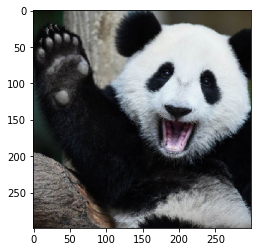

In [29]:
img_path = tf.keras.utils.get_file('Panda', origin= 'https://pbs.twimg.com/profile_images/829274786362699776/a1ttXfVG.jpg')

img = image.load_img(img_path, target_size=(299, 299))
x_img = image.img_to_array(img)
x_img = np.expand_dims(x_img, axis=0).astype(np.float) / 255.0
# x_img = preprocess_input(x_img)
# print(x_img)
plt.imshow(x_img[0]);

In [7]:
model = InceptionV3(weights='imagenet')

96116736/96112376 [==============================] - 0s 0us/step


In [115]:
# x_check = preprocess_input(x_img.copy())

pred = model.predict(x_img)
label = np.argmax(pred, axis=1)[0]
confidence = pred[:,label][0]

print("----- Prediction -----\n")
print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))
print("\n")
print("--- Probabilities ----\n")
print(decode_predictions(pred))

----- Prediction -----

Prediction: giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca - confidence 0.86


--- Probabilities ----

[[('n02510455', 'giant_panda', 0.8586567), ('n04254680', 'soccer_ball', 0.0026330089), ('n02500267', 'indri', 0.0019482957), ('n02509815', 'lesser_panda', 0.0017129878), ('n04266014', 'space_shuttle', 0.0010382481)]]


In [119]:
# Generating Adversarial Attack Sample
fgsm_samples = fast_gradient_method(model, x_img, 0.005, np.inf, targeted=False, clip_min=0, clip_max=1)

In [1]:
fig = plt.figure(figsize=(16, 64))

ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Orignal Image')
ax1.imshow((x_img[0]))

ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text('Adversarial Attack')
ax2.imshow((fgsm_samples.numpy()[0] - x_img[0])*255)

ax2 = fig.add_subplot(1,3,3)
ax2.title.set_text('Adversarial Image')
ax2.imshow(fgsm_samples.numpy()[0])

NameError: ignored

In [121]:
pred = model.predict(fgsm_samples)
label = np.argmax(pred, axis=1)[0]
confidence = pred[:,label][0]


print("----- Prediction -----\n")
print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))
print("\n")
print("--- Probabilities ----\n")
print(decode_predictions(pred))

----- Prediction -----

Prediction: giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca - confidence 0.45


--- Probabilities ----

[[('n02510455', 'giant_panda', 0.44759792), ('n02500267', 'indri', 0.010639329), ('n04254680', 'soccer_ball', 0.0038676402), ('n04399382', 'teddy', 0.0038562876), ('n01950731', 'sea_slug', 0.0035807882)]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


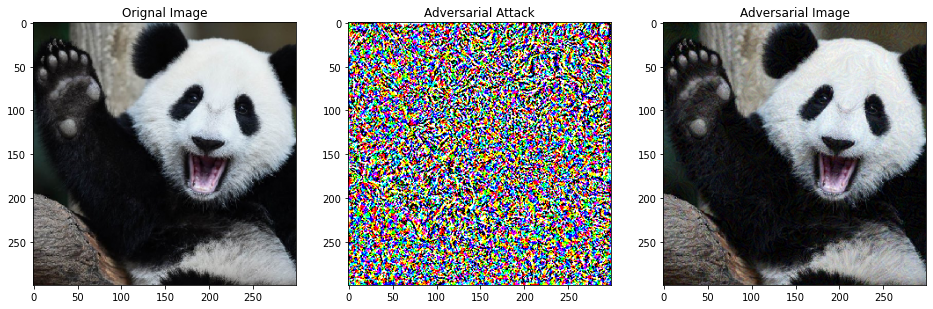

In [117]:
pgd_samples = projected_gradient_descent(model, x_img, eps_iter=0.01,eps=0.05, nb_iter=5, norm= np.inf, targeted=False)

fig = plt.figure(figsize=(16, 64))

ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Orignal Image')
ax1.imshow((x_img[0]))

ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text('Adversarial Attack')
ax2.imshow((pgd_samples.numpy()[0] - x_img[0])*255)

ax2 = fig.add_subplot(1,3,3)
ax2.title.set_text('Adversarial Image')
ax2.imshow(pgd_samples.numpy()[0])

In [118]:
pred = model.predict(pgd_samples)
label = np.argmax(pred, axis=1)[0]
confidence = pred[:,label][0]

print("----- Prediction -----\n")
print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))
print("\n")
print("--- Probabilities ----\n")
print(decode_predictions(pred))

----- Prediction -----

Prediction: teddy, teddy bear - confidence 1.00


--- Probabilities ----

[[('n04399382', 'teddy', 0.9999645), ('n02105251', 'briard', 3.3151794e-06), ('n02834397', 'bib', 3.230958e-06), ('n01692333', 'Gila_monster', 1.9822683e-06), ('n02869837', 'bonnet', 1.4482821e-06)]]
